<h1>Braginsky Solutions from 1993</h1>

In [2]:
import numpy as np
from scipy.special import clpmn, lpmv
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import cos, sin
%matplotlib inline

In [5]:
mu = np.linspace(-1,1,180)
x = np.linspace(1,0,80)
R = 3480. # Outer core radius in km
Omega = 2*np.pi/(24.0*3600.0) # rotation rate in rad/s
omega = 2*np.pi/(65*365.25*24.*3600.) # Oscillation period for T=1
rho = 1.e4  # density in kg/m^3
H = 80. # layer thickness in km
k_H = np.pi/H
Bd = (4.46E-6)

m=1
n=2 # n=2 for T1, n=4 for T2
upha = 1.
utha = upha*k_H**2*Bd**2/(2*Omega*omega)
ura = utha*n*(n+1)/(k_H*R)
bpha = upha*k_H*Bd/omega
btha = bpha*k_H**2*Bd**2/(2*Omega*omega)
bra = btha/(k_H*R)
uph = upha*(np.ones((len(x),len(mu))).T*(1+cos(np.pi*x))).T*lpmv(m,n,mu)/mu
uth = utha*(np.ones((len(x),len(mu))).T*(-1j*cos(np.pi*x))).T*lpmv(m,n,mu)
ur =  ura*(np.ones((len(x),len(mu))).T*(-1j*sin(np.pi*x))).T*lpmv(0,n,mu)
bph = bpha*(np.ones((len(x),len(mu))).T*(1j*sin(np.pi*x))).T*lpmv(m,n,mu)
bth = btha*(np.ones((len(x),len(mu))).T*(sin(np.pi*x))).T*lpmv(m,n,mu)*mu
br = bra*(np.ones((len(x),len(mu))).T*(-cos(np.pi*x))).T*np.append(np.diff(lpmv(m,n,mu)*mu),0)

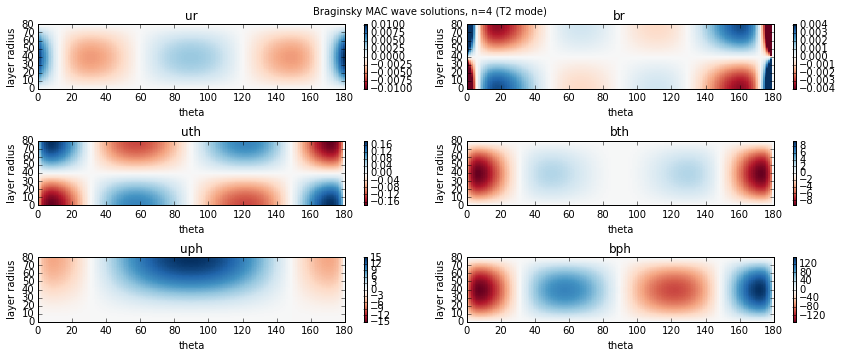

In [6]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('Braginsky MAC wave solutions, n=4 (T2 mode)')
plt.subplot(3,2,1)
urlim = np.amax(abs(ur))
plt.pcolor(1j*ur[:,:],cmap='RdBu',vmax = urlim,vmin=-urlim)
plt.title('ur')
plt.xlabel('theta')
plt.ylabel('layer radius')
plt.colorbar()

plt.subplot(3,2,3)
uthlim = np.amax(abs(uth))
plt.pcolor(1j*uth[:,:],cmap='RdBu',vmax = uthlim,vmin=-uthlim)
plt.title('uth')
plt.xlabel('theta')
plt.ylabel('layer radius')
plt.colorbar()

plt.subplot(3,2,5)
uphlim = np.amax(abs(uph))
plt.pcolor(uph[:,:],cmap='RdBu',vmax = uphlim,vmin=-uphlim)
plt.title('uph')
plt.xlabel('theta')
plt.ylabel('layer radius')
plt.colorbar()

plt.subplot(3,2,2)
brlim = np.amax(abs(br))*.1
plt.pcolor(br[:,:],cmap='RdBu',vmax = brlim,vmin=-brlim)
plt.title('br')
plt.xlabel('theta')
plt.ylabel('layer radius')
plt.colorbar()

plt.subplot(3,2,4)
bthlim = np.amax(abs(bth))
plt.pcolor(bth[:,:],cmap='RdBu',vmax = bthlim,vmin=-bthlim)
plt.title('bth')
plt.xlabel('theta')
plt.ylabel('layer radius')
plt.colorbar()

plt.subplot(3,2,6)
bphlim = np.amax(abs(bph))
plt.pcolor(1j*bph[:,:],cmap='RdBu',vmax = bphlim,vmin=-bphlim)
plt.title('bph')
plt.xlabel('theta')
plt.ylabel('layer radius')
plt.colorbar()
fig.tight_layout()
plt.show()


done!


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


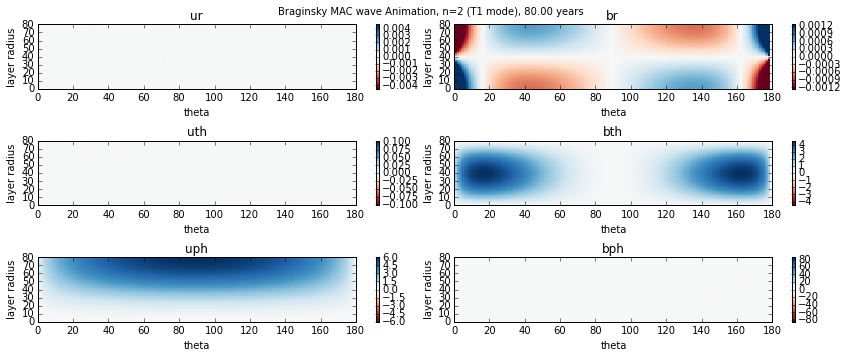

In [3]:
##  Animation
import matplotlib.animation as animation
import matplotlib as mpl
mpl.use("Agg")
T1 = 65
T2 = 32
l1 = 2*np.pi/(T1)
l2 = 2*np.pi/(T2)

mu = np.linspace(-1,1,180)
x = np.linspace(1,0,80)
R = 3480. # Outer core radius in km
Omega = 2*np.pi/(24.0*3600.0) # rotation rate in rad/s
omega = 2*np.pi/(65*365.25*24.*3600.) # Oscillation period for T=1
rho = 1.e4  # density in kg/m^3
H = 80. # layer thickness in km
k_H = np.pi/H
Bd = (4.46E-6)

m=1
n=2 # n=2 for T1, n=4 for T2
upha = 1.
utha = upha*k_H**2*Bd**2/(2*Omega*omega)
ura = utha*n*(n+1)/(k_H*R)
bpha = upha*k_H*Bd/omega
btha = bpha*k_H**2*Bd**2/(2*Omega*omega)
bra = btha/(k_H*R)

uph = upha*(np.ones((len(x),len(mu))).T*(1+cos(np.pi*x))).T*lpmv(m,n,mu)/mu
uth = utha*(np.ones((len(x),len(mu))).T*(-1j*cos(np.pi*x))).T*lpmv(m,n,mu)
ur =  ura*(np.ones((len(x),len(mu))).T*(-1j*sin(np.pi*x))).T*lpmv(m,n,mu)
bph = bpha*(np.ones((len(x),len(mu))).T*(1j*sin(np.pi*x))).T*lpmv(m,n,mu)
bth = btha*(np.ones((len(x),len(mu))).T*(sin(np.pi*x))).T*lpmv(m,n,mu)*mu
br = bra*(np.ones((len(x),len(mu))).T*(-cos(np.pi*x))).T*np.append(np.diff(lpmv(m,n,mu)*mu),0)
urlim = np.amax(abs(ur))
uthlim = np.amax(abs(uth))
uphlim = np.amax(abs(uph))
brlim = np.amax(abs(br))*0.1
bthlim = np.amax(abs(bth))
bphlim = np.amax(abs(bph))

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
fig = plt.figure(figsize=(12,5))
time=0

def first_frame(*args):
    global uph,uth,ur,bph,bth,br,time,dtime,urlim,uthlim,uphlim,brlim,bthlim,bphlim
    fig.suptitle('Braginsky MAC wave Animation, n=2 (T1 mode), {0:.2f} years'.format(time))
                 
    plt.subplot(3,2,1)
    plt.pcolor(ur[:,:].real,cmap='RdBu',vmax = urlim,vmin=-urlim)
    plt.title('ur')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()

    plt.subplot(3,2,3)
    plt.pcolor(uth[:,:].real,cmap='RdBu',vmax = uthlim,vmin=-uthlim)
    plt.title('uth')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()

    plt.subplot(3,2,5)
    plt.pcolor(uph[:,:].real,cmap='RdBu',vmax = uphlim,vmin=-uphlim)
    plt.title('uph')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()

    plt.subplot(3,2,2)
    plt.pcolor(br[:,:].real,cmap='RdBu',vmax = brlim,vmin=-brlim)
    plt.title('br')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()

    plt.subplot(3,2,4)
    plt.pcolor(bth[:,:].real,cmap='RdBu',vmax = bthlim,vmin=-bthlim)
    plt.title('bth')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()

    plt.subplot(3,2,6)
    plt.pcolor(bph[:,:].real,cmap='RdBu',vmax = bphlim,vmin=-bphlim)
    plt.title('bph')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()
    fig.tight_layout()
    return fig     
## Animation Functions
dtime = 2
l=l2
def updatefig(*args):
    global uph,uth,ur,bph,bth,br,time,dtime,urlim,uthlim,uphlim,brlim,bthlim,bphlim
    # update values
    uph = uph*np.exp(1j*l*dtime)
    uth = uth*np.exp(1j*l*dtime)
    ur = ur*np.exp(1j*l*dtime)
    bph = bph*np.exp(1j*l*dtime)
    bth = bth*np.exp(1j*l*dtime)
    br = br*np.exp(1j*l*dtime)
    time = time+dtime
    # update plot
    fig.clf()
    fig.suptitle('Braginsky MAC wave Animation, n=2 (T1 mode), {0:.2f} years'.format(time))
                 
    plt.subplot(3,2,1)
    plt.pcolor(ur[:,:].real,cmap='RdBu',vmax = urlim,vmin=-urlim)
    plt.title('ur')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()

    plt.subplot(3,2,3)
    plt.pcolor(uth[:,:].real,cmap='RdBu',vmax = uthlim,vmin=-uthlim)
    plt.title('uth')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()

    plt.subplot(3,2,5)
    plt.pcolor(uph[:,:].real,cmap='RdBu',vmax = uphlim,vmin=-uphlim)
    plt.title('uph')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()

    plt.subplot(3,2,2)
    plt.pcolor(br[:,:].real,cmap='RdBu',vmax = brlim,vmin=-brlim)
    plt.title('br')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()

    plt.subplot(3,2,4)
    plt.pcolor(bth[:,:].real,cmap='RdBu',vmax = bthlim,vmin=-bthlim)
    plt.title('bth')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()

    plt.subplot(3,2,6)
    plt.pcolor(bph[:,:].real,cmap='RdBu',vmax = bphlim,vmin=-bphlim)
    plt.title('bph')
    plt.xlabel('theta')
    plt.ylabel('layer radius')
    plt.colorbar()
    fig.tight_layout()
    return fig     

im_ani = animation.FuncAnimation(fig, updatefig,  frames=40, init_func=first_frame)
im_ani.save('./output/m=0/BraginskyAnimationT1.mp4', writer=writer)
print 'done!'